# **Anomaly Detection & Time Series  Questions and Answers**

### 1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

- Anomaly Detection is the process of identifying data points, events, or patterns that deviate significantly from the expected or normal behavior.

- These unusual occurrences are called anomalies or outliers, and detecting them is important in applications like fraud detection, network security, healthcare monitoring, and fault detection.

> There are three main types of anomalies:

  1. Point Anomalies

      - A single data point is very different from the rest.

      - Example: In a credit card transaction dataset, most transactions are between ₹500-₹10,000, but one transaction is ₹5,00,000. That transaction is a point anomaly

  2. Contextual Anomalies

      - A data point is abnormal in a specific context (time, location, season, etc.).

      - Example: Spending ₹10,000 in December (holiday season) may be normal, but spending the same amount on a regular weekday in March might be unusual. Similarly, 20°C may be normal in winter in Mumbai but abnormal in summer.

  3. Collective Anomalies

      - A group of related data points collectively deviate from normal behavior, even if individual points are not abnormal.

      - Example: In a network system, a sudden burst of traffic for 10 minutes may indicate a DDoS attack, even if each request by itself looks normal.

- In summary: Point anomaly → one unusual data point, Contextual anomaly → unusual given the context, Collective anomaly → unusual group pattern

--

### 2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases

> Isolation Forest (iForest)

  1. Approach - Uses random partitioning of data (decision trees) to isolate points. Anomalies are easier to isolate since they lie in sparse regions.

  2. Best For - High-dimensional datasets, large-scale anomaly detection.

  3. Use Case Example: Fraud detection in banking transactions.

> DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

  1. Approach: Groups points into clusters based on density. Points that do not belong to any cluster (low-density regions) are treated as anomalies.

  2. Best For: Data with clusters of similar density and unknown number of clusters.

  3. Use Case Example: Detecting spatial anomalies in GPS or location-based data.

> Local Outlier Factor (LOF)

  1. Approach: Measures the local density of each point compared to its neighbors. A point is an outlier if its density is much lower than surrounding points.

  2. Best For: Datasets with varying density regions.

  3. Use Case Example: Network intrusion detection where some traffic patterns are locally sparse.

- Summary : Isolation Forest → Good for high-dimensional, large datasets, DBSCAN → Good for spatial data and clustering + anomaly detection together, LOF → Good for detecting anomalies in datasets with varying densities.

--

### 3. What are the key components of a Time Series? Explain each with one example.

- A Time Series is a sequence of data points collected over time, and it usually has four key components:

  1. Trend : The long-term direction (upward, downward, or stable) in the data, Example: The steady increase in smartphone sales over the last 10 years shows an upward trend.

  2. Seasonality : Regular, repeating patterns in data within fixed periods (daily, monthly, yearly), Example: Ice cream sales peak every summer and drop in winter, showing seasonality.

  3. Cyclic Component : Long-term fluctuations caused by economic or business cycles, not fixed like seasonality, Example: Stock market performance rising and falling with economic cycles (growth → recession → recovery).

  4. Irregular/Random Component - Unpredictable variations caused by unexpected events, Example: A sudden drop in airline ticket sales due to a natural disaster or pandemic.

- Summary: Trend → overall direction, Seasonality → repeating short-term patterns, Cyclic → long-term economic/business cycles, Irregular → random shocks

--

### 4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

- A time series is stationary if its statistical properties (mean, variance, and autocorrelation) remain constant over time.

- Stationarity is important because many forecasting models (like ARIMA) assume the data is stationary.

> How to Test Stationarity?

  1. Visual Inspection – Plot the series and check if mean/variance looks stable.

  2. Summary Statistics – Compare mean/variance of different time windows.

  3. Statistical Tests –

      - Augmented Dickey-Fuller (ADF) test → if p-value < 0.05 → series is stationary.

      - KPSS test → if p-value > 0.05 → series is stationary.

> How to Transform Non-Stationary to Stationary?

  1. Differencing - Subtract current value from the previous value.Ex- Y_t – Y_(t-1) removes trend.

  2. Log Transformation – Stabilizes variance in series with exponential growth.

  3. Detrending – Remove the trend component explicitly.

  4. Seasonal Adjustment – Remove repeating seasonal patterns.

- In summary: Stationary = constant mean, variance, autocorrelation. Test → ADF/KPSS.Transform → differencing, log, detrending, seasonal adjustment.

--

### 5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application

> AR (AutoRegressive model)

  1. Structure: Forecasts a variable using its past values.

  2. Equation - Y(small t) = c + ϕ1Y(small t-1) + ϕ2Y(small t-2) +....+ϵ(small t)

  3. Application: Stock prices where past values influence future values.

> MA (Moving Average model)

  1. Structure: Forecasts based on past forecast errors (residuals).

  2. Equation: Y(small t) = c + θ1ϵ(small t-1) + θ2ϵ(small t-2) +....+ϵ(small t)

  3. Application: Noise reduction in short-term demand forecasting.

> ARIMA (AutoRegressive Integrated Moving Average)

  1. Structure: Combines AR + differencing (I) + MA.

  2. Parameters: (p, d, q) → p = AR order, d = differencing, q = MA order.

  3. Application: Non-stationary time series like sales forecasting.

> SARIMA (Seasonal ARIMA)

  1. Structure: Extends ARIMA with seasonal components → (p,d,q)(P,D,Q,s).

  2. Application: Seasonal datasets like monthly airline passenger data.

> SARIMAX (Seasonal ARIMA with Exogenous Variables)

  1. Structure: SARIMA + external explanatory variables (X).

  2. Application: Forecasting sales while including factors like promotions, holidays, or economic indicators.

- Summary - AR → depends on past values.MA → depends on past errors.ARIMA → AR + MA + differencing (for non-stationarity).SARIMA → ARIMA + seasonality.SARIMAX → SARIMA + external factors.

--




# **Practical Questions and Answers**

Dataset -
● NYC Taxi Fare Data
● AirPassengers Dataset

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


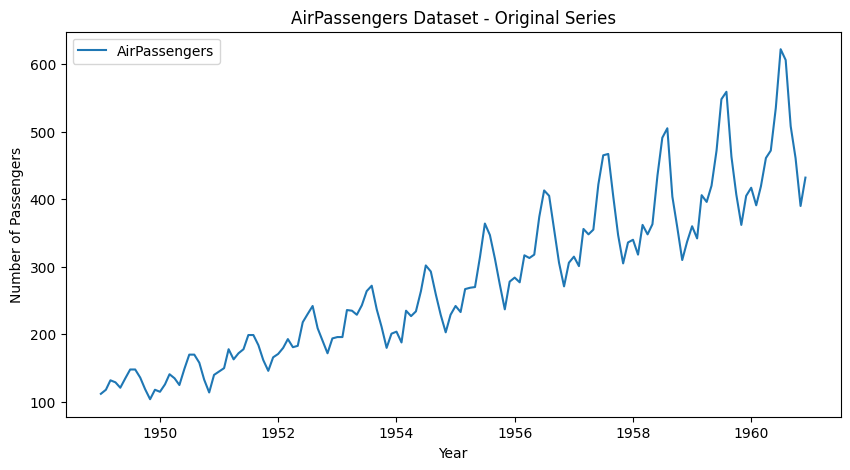

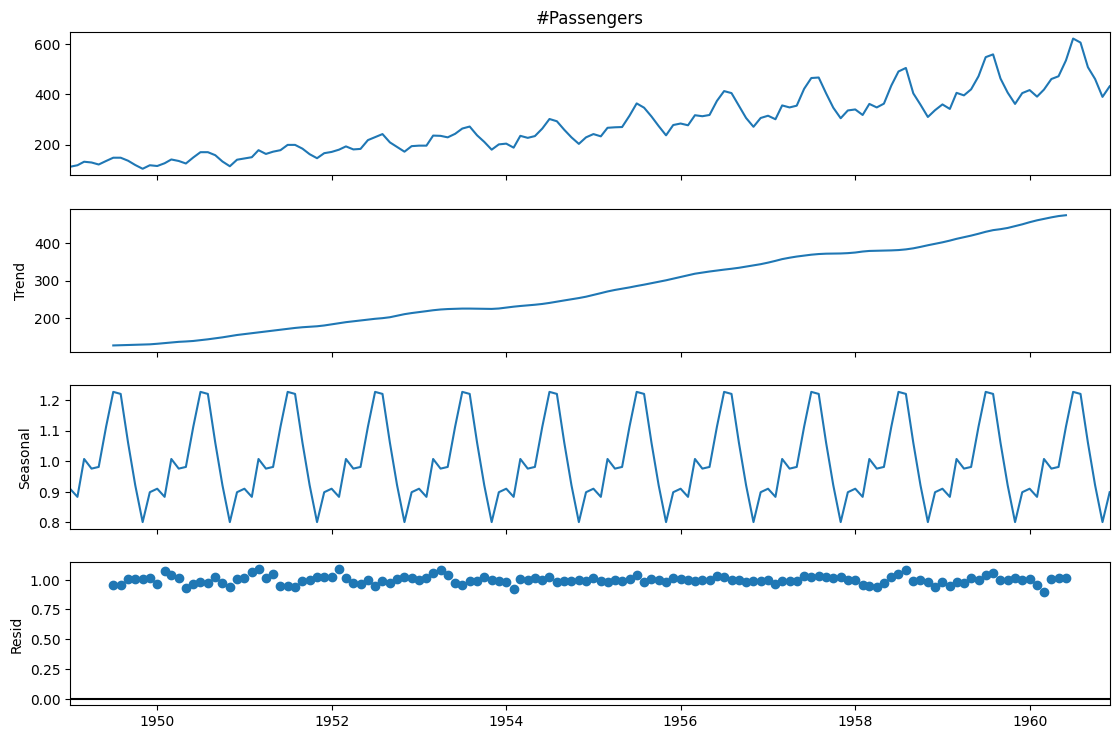

In [3]:
'''
#1. Load a time series dataset (e.g., AirPassengers), plot the original series,and decompose it into trend, seasonality, and residual components
'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Step 2: Load Dataset ---
df = pd.read_csv("/content/AirPassengers.csv")

# Inspect dataset
print(df.head())

# --- Step 3: Convert to Time Series ---
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# --- Step 4: Plot Original Time Series ---
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label="AirPassengers")
plt.title("AirPassengers Dataset - Original Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# --- Step 5: Decompose Time Series ---
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative')

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03                1   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04                1   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52                1   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14                1   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2           1                  N           238           239   
1            1.2           1                  N           239           238   
2            0.6           1                  N           238           238   
3            0.8           1                  N           238           151   
4            0.0           1                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


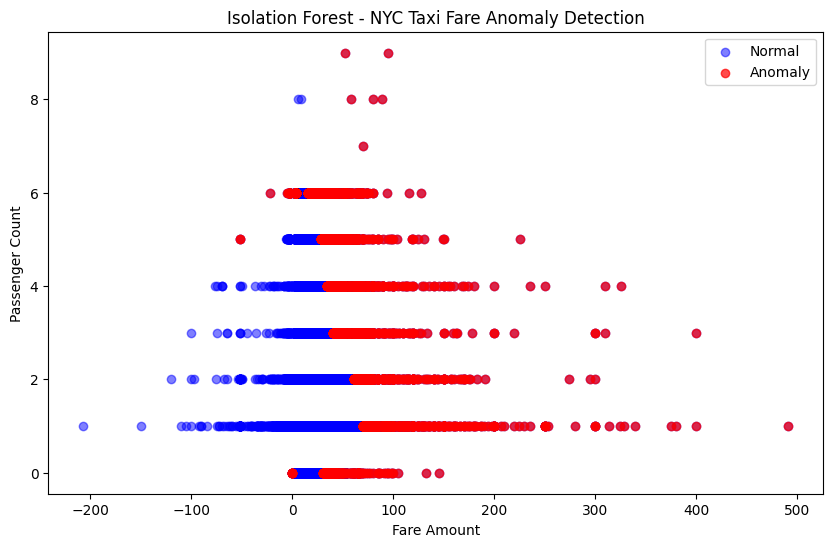

In [1]:
'''
#2. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
'''

# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- Step 2: Load Dataset ---
# Replace with your file path in Colab
df = pd.read_csv("/content/NYC_taxi_fare_data.csv")

# Inspect data
print(df.head())

# --- Step 3: Select numerical features ---
# Example: using fare amount and trip distance (adjust columns based on dataset)
df = df[['fare_amount', 'passenger_count']].dropna()

# --- Step 4: Apply Isolation Forest ---
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(df)

# anomaly = -1 → anomaly, 1 → normal
print(df['anomaly'].value_counts())

# --- Step 5: Visualization ---
plt.figure(figsize=(10,6))

# Normal points
plt.scatter(df['fare_amount'], df['passenger_count'],
            c='blue', label='Normal', alpha=0.5)

# Anomalies
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies['fare_amount'], anomalies['passenger_count'],
            c='red', label='Anomaly', alpha=0.7)

plt.xlabel("Fare Amount")
plt.ylabel("Passenger Count")
plt.title("Isolation Forest - NYC Taxi Fare Anomaly Detection")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


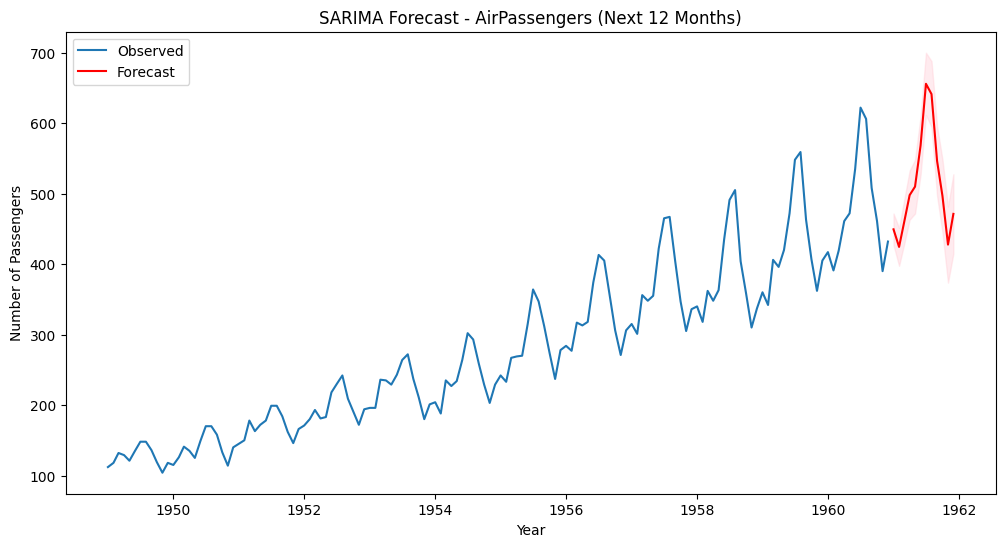

In [2]:
'''
#3. Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
'''

# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Step 2: Load Dataset ---
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Use the correct column
y = df['#Passengers']

# --- Step 3: Train SARIMA Model ---
# SARIMA(p,d,q)(P,D,Q,s)
# s = 12 for monthly seasonality
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# --- Step 4: Forecast Next 12 Months ---
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# --- Step 5: Visualization ---
plt.figure(figsize=(12,6))
plt.plot(y, label="Observed")
plt.plot(forecast_mean, label="Forecast", color="red")

# Confidence intervals
plt.fill_between(forecast_conf.index,
                 forecast_conf.iloc[:,0],
                 forecast_conf.iloc[:,1],
                 color="pink", alpha=0.3)

plt.title("SARIMA Forecast - AirPassengers (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

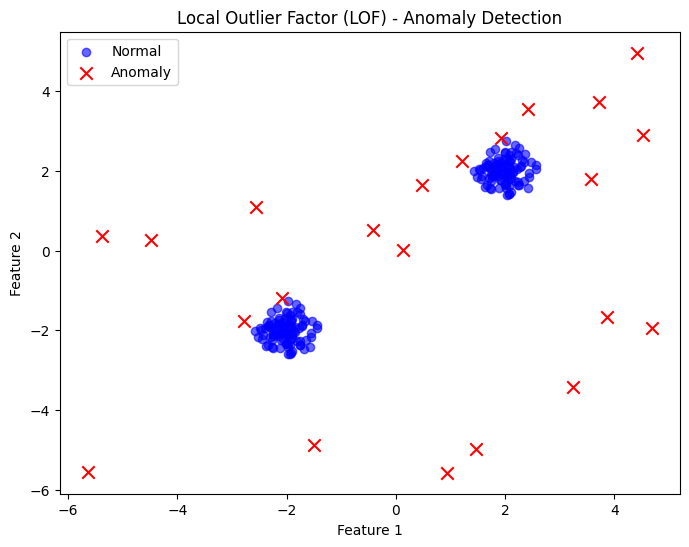

In [3]:
'''
#4. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
'''

# --- Step 1: Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# --- Step 2: Create Synthetic Dataset ---
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]   # two clusters

# Add some outliers
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

# Combine into one dataset
X = np.r_[X_inliers, X_outliers]

# --- Step 3: Apply Local Outlier Factor ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)   # -1 = anomaly, 1 = normal

# --- Step 4: Visualization ---
plt.figure(figsize=(8,6))

# Normal points
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c="blue", label="Normal", alpha=0.6)

# Anomalies
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            c="red", label="Anomaly", marker="x", s=80)

plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

/tmp/ipython-input-373106989.py:29: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start="2023-01-01", periods=24*7, freq="15T")  # 1 week of 15-min data


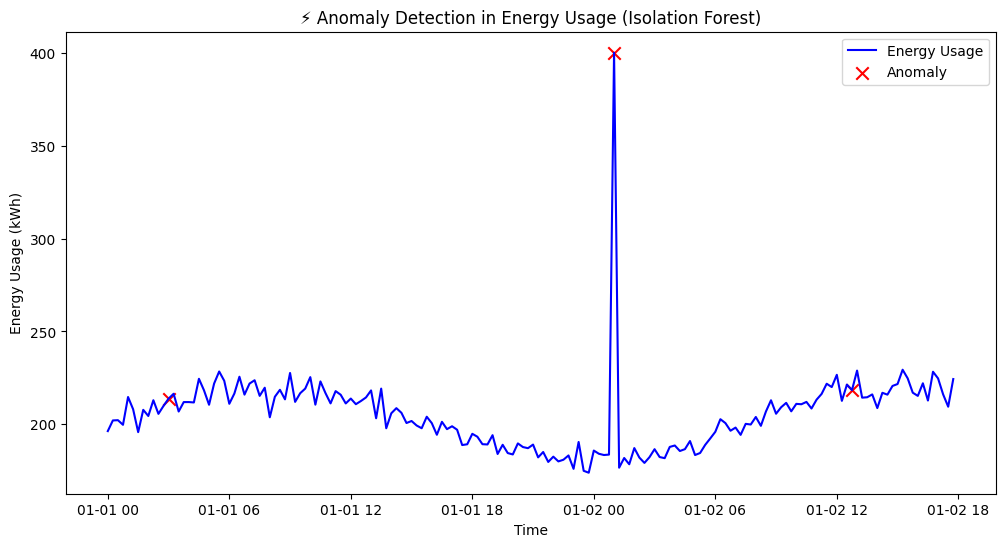

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


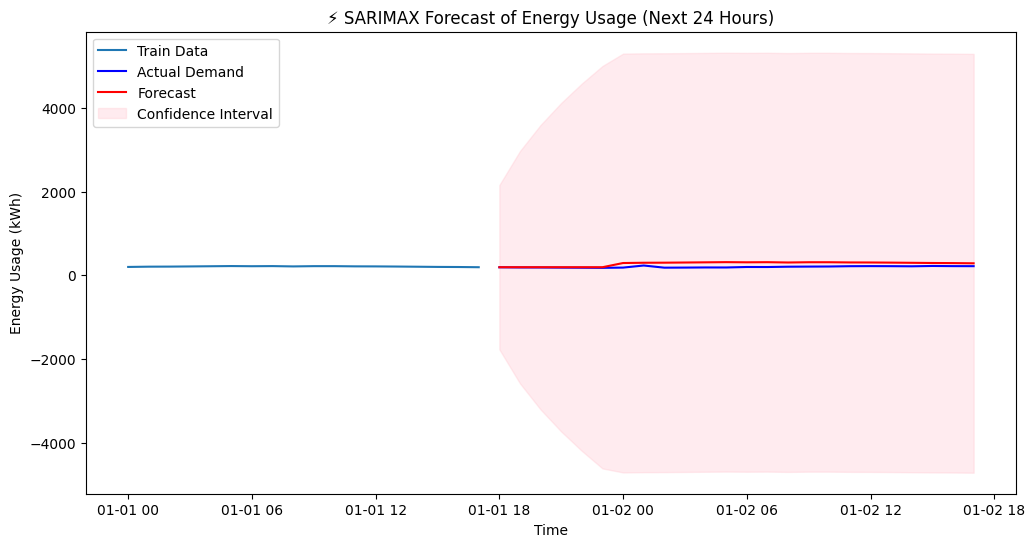

MAPE: 0.3724
RMSE: 86.2277


In [12]:
'''
#5. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?
'''

# ⚡ Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


# ⚡ Step 2: Simulate Power Grid Data (15-min frequency)
np.random.seed(42)

date_rng = pd.date_range(start="2023-01-01", periods=24*7, freq="15T")  # 1 week of 15-min data
data = {
    "timestamp": date_rng,
    "region": np.random.choice(["North","South","East","West"], size=len(date_rng)),
    "weather_temp": np.random.normal(25, 5, size=len(date_rng)),   # temperature in Celsius
    "energy_usage": 200 + 20*np.sin(np.arange(len(date_rng))/20) + np.random.normal(0,5,len(date_rng))
}
df = pd.DataFrame(data)

# Inject anomalies (spikes/drops)
df.loc[100, "energy_usage"] = 400   # sudden spike
df.loc[250, "energy_usage"] = 50    # sudden drop

df.head()

# ⚡ Step 3: Anomaly Detection with Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df["anomaly"] = iso.fit_predict(df[["energy_usage","weather_temp"]])  # -1 anomaly, 1 normal

# Visualization
plt.figure(figsize=(12,6))
plt.plot(df["timestamp"], df["energy_usage"], label="Energy Usage", color="blue")
plt.scatter(df.loc[df["anomaly"]==-1, "timestamp"],
            df.loc[df["anomaly"]==-1, "energy_usage"],
            color="red", label="Anomaly", marker="x", s=80)
plt.title("⚡ Anomaly Detection in Energy Usage (Isolation Forest)")
plt.xlabel("Time")
plt.ylabel("Energy Usage (kWh)")
plt.legend()
plt.show()

# ⚡ Step 4: Short-Term Forecasting with SARIMAX (Fixed)
# Aggregate to hourly average (numeric columns only)
df_hourly = df.resample("h", on="timestamp")[["energy_usage", "weather_temp"]].mean()

# Train-test split (last 24 hours as test)
train = df_hourly.iloc[:-24]
test = df_hourly.iloc[-24:]

# SARIMAX with weather as external regressor
model = SARIMAX(train["energy_usage"], exog=train[["weather_temp"]],
                order=(1,1,1), seasonal_order=(1,1,1,24))
results = model.fit(disp=False)

# Forecast next 24 hours
forecast = results.get_forecast(steps=24, exog=test[["weather_temp"]])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(train.index, train["energy_usage"], label="Train Data")
plt.plot(test.index, test["energy_usage"], label="Actual Demand", color="blue")
plt.plot(test.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color="pink", alpha=0.3, label="Confidence Interval")
plt.title("⚡ SARIMAX Forecast of Energy Usage (Next 24 Hours)")
plt.xlabel("Time")
plt.ylabel("Energy Usage (kWh)")
plt.legend()
plt.show()

# ⚡ Step 5: Validation Metrics (fixed)
# Convert to NumPy to avoid any index alignment quirks
y_true = test["energy_usage"].to_numpy()
y_pred = forecast_mean.to_numpy()

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # no 'squared' arg

print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")


# ⚡ Power Grid Monitoring – Real-Time Workflow

This notebook explains and demonstrates how a data scientist can handle **energy demand forecasting** and **real-time anomaly detection** for a power grid monitoring company.  

---

## 📌 Q5. Real-Time Data Science Workflow

**Problem:**  
You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and detect abnormal spikes/drops in real-time consumption data collected every 15 minutes.  

---

### 🔹 1. Anomaly Detection in Streaming Data
- **Isolation Forest** → detects sudden spikes/drops, scalable for high-frequency streaming data.  
- **LOF (Local Outlier Factor)** → useful when anomalies depend on local neighborhood (e.g., one region different from others).  
- **DBSCAN** → detects outliers when data forms clusters (e.g., weekday vs weekend patterns).  

**Implementation:** Stream processing (Kafka + Spark/Flink) to run anomaly detection continuously and trigger alerts.  

---

### 🔹 2. Short-Term Forecasting
- **SARIMAX** → chosen for its ability to model:
  - **Seasonality** (daily/weekly cycles).  
  - **External features (weather, region, holidays).**  
- Alternatives:
  - **ARIMA/SARIMA** if no external features available.  

---

### 🔹 3. Validation & Monitoring
- **Backtesting** → sliding windows on historical data.  
- **Metrics**:
  - Forecast → MAPE, RMSE.  
  - Anomaly detection → Precision, Recall.  
- **Monitoring**:
  - Track forecast errors → retrain when drift increases.  
  - Build dashboards for anomaly alerts.  

---

### 🔹 4. Business Impact
- Prevent blackouts & equipment failures → via early anomaly detection.  
- Optimize power generation → save costs.  
- Enable demand response → balance load across regions.  
- Increase customer satisfaction → reliable supply.  

---